## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  24.236787   221.452170  0.692864  4.996306  1.432595
1  63.029269  1252.809662  0.023896  3.555583  0.265043
2  31.312364   602.547658  0.250692  2.672137  1.438887
3  38.257823   428.597738  0.982850  2.056237  1.269032
4  12.346585   466.091512  0.385617  1.260435  1.465190


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9922445	total: 69.3ms	remaining: 1m 9s
1:	learn: 0.9828314	total: 70ms	remaining: 34.9s
2:	learn: 0.9717326	total: 70.5ms	remaining: 23.4s
3:	learn: 0.9609391	total: 70.9ms	remaining: 17.7s
4:	learn: 0.9502148	total: 71.4ms	remaining: 14.2s
5:	learn: 0.9403775	total: 71.9ms	remaining: 11.9s
6:	learn: 0.9300850	total: 72.4ms	remaining: 10.3s
7:	learn: 0.9206517	total: 72.9ms	remaining: 9.03s
8:	learn: 0.9115611	total: 73.3ms	remaining: 8.07s
9:	learn: 0.9000980	total: 73.8ms	remaining: 7.31s
10:	learn: 0.8907272	total: 74.4ms	remaining: 6.69s
11:	learn: 0.8820710	total: 74.9ms	remaining: 6.17s
12:	learn: 0.8741618	total: 75.3ms	remaining: 5.72s
13:	learn: 0.8653581	total: 75.7ms	remaining: 5.33s
14:	learn: 0.8558903	total: 76.2ms	remaining: 5.01s
15:	learn: 0.8480686	total: 76.8ms	remaining: 4.72s
16:	learn: 0.8383614	total: 77.3ms	remaining: 4.47s
17:	learn: 0.8319932	total: 77.7ms	remaining: 4.24s
18:	learn: 0.8237303	total: 78.1ms	remaining: 

88:	learn: 0.4377676	total: 108ms	remaining: 1.11s
89:	learn: 0.4341493	total: 109ms	remaining: 1.1s
90:	learn: 0.4304623	total: 109ms	remaining: 1.09s
91:	learn: 0.4272363	total: 110ms	remaining: 1.08s
92:	learn: 0.4241075	total: 110ms	remaining: 1.07s
93:	learn: 0.4201532	total: 111ms	remaining: 1.06s
94:	learn: 0.4172746	total: 111ms	remaining: 1.06s
95:	learn: 0.4140578	total: 111ms	remaining: 1.05s
96:	learn: 0.4110319	total: 112ms	remaining: 1.04s
97:	learn: 0.4079930	total: 112ms	remaining: 1.03s
98:	learn: 0.4049699	total: 112ms	remaining: 1.02s
99:	learn: 0.4023586	total: 113ms	remaining: 1.02s
100:	learn: 0.3991200	total: 113ms	remaining: 1.01s
101:	learn: 0.3964590	total: 114ms	remaining: 1s
102:	learn: 0.3941152	total: 114ms	remaining: 994ms
103:	learn: 0.3904059	total: 114ms	remaining: 986ms
104:	learn: 0.3873288	total: 115ms	remaining: 978ms
105:	learn: 0.3841807	total: 115ms	remaining: 971ms
106:	learn: 0.3808198	total: 116ms	remaining: 965ms
107:	learn: 0.3782141	total:

265:	learn: 0.1681336	total: 187ms	remaining: 515ms
266:	learn: 0.1675256	total: 187ms	remaining: 514ms
267:	learn: 0.1669737	total: 188ms	remaining: 513ms
268:	learn: 0.1664376	total: 188ms	remaining: 512ms
269:	learn: 0.1658615	total: 189ms	remaining: 510ms
270:	learn: 0.1649147	total: 189ms	remaining: 509ms
271:	learn: 0.1639878	total: 190ms	remaining: 508ms
272:	learn: 0.1635526	total: 190ms	remaining: 507ms
273:	learn: 0.1626072	total: 191ms	remaining: 505ms
274:	learn: 0.1618852	total: 191ms	remaining: 504ms
275:	learn: 0.1614363	total: 192ms	remaining: 503ms
276:	learn: 0.1606509	total: 192ms	remaining: 502ms
277:	learn: 0.1601602	total: 193ms	remaining: 501ms
278:	learn: 0.1592691	total: 193ms	remaining: 499ms
279:	learn: 0.1587105	total: 194ms	remaining: 498ms
280:	learn: 0.1582767	total: 194ms	remaining: 497ms
281:	learn: 0.1574114	total: 195ms	remaining: 496ms
282:	learn: 0.1568526	total: 195ms	remaining: 494ms
283:	learn: 0.1563325	total: 195ms	remaining: 493ms
284:	learn: 

499:	learn: 0.0891674	total: 290ms	remaining: 290ms
500:	learn: 0.0889552	total: 291ms	remaining: 289ms
501:	learn: 0.0888744	total: 291ms	remaining: 289ms
502:	learn: 0.0887248	total: 292ms	remaining: 288ms
503:	learn: 0.0885590	total: 292ms	remaining: 287ms
504:	learn: 0.0883851	total: 292ms	remaining: 287ms
505:	learn: 0.0883056	total: 293ms	remaining: 286ms
506:	learn: 0.0879621	total: 293ms	remaining: 285ms
507:	learn: 0.0878519	total: 294ms	remaining: 284ms
508:	learn: 0.0876992	total: 294ms	remaining: 284ms
509:	learn: 0.0875653	total: 294ms	remaining: 283ms
510:	learn: 0.0874885	total: 295ms	remaining: 282ms
511:	learn: 0.0872846	total: 295ms	remaining: 281ms
512:	learn: 0.0869517	total: 296ms	remaining: 281ms
513:	learn: 0.0868446	total: 296ms	remaining: 280ms
514:	learn: 0.0867144	total: 297ms	remaining: 279ms
515:	learn: 0.0865876	total: 297ms	remaining: 279ms
516:	learn: 0.0865131	total: 297ms	remaining: 278ms
517:	learn: 0.0861893	total: 298ms	remaining: 277ms
518:	learn: 

686:	learn: 0.0560047	total: 368ms	remaining: 168ms
687:	learn: 0.0559655	total: 369ms	remaining: 167ms
688:	learn: 0.0556870	total: 369ms	remaining: 167ms
689:	learn: 0.0555197	total: 369ms	remaining: 166ms
690:	learn: 0.0552642	total: 370ms	remaining: 165ms
691:	learn: 0.0552081	total: 370ms	remaining: 165ms
692:	learn: 0.0549575	total: 371ms	remaining: 164ms
693:	learn: 0.0547046	total: 371ms	remaining: 164ms
694:	learn: 0.0545051	total: 372ms	remaining: 163ms
695:	learn: 0.0542614	total: 372ms	remaining: 163ms
696:	learn: 0.0540681	total: 373ms	remaining: 162ms
697:	learn: 0.0538297	total: 373ms	remaining: 161ms
698:	learn: 0.0536727	total: 374ms	remaining: 161ms
699:	learn: 0.0534399	total: 374ms	remaining: 160ms
700:	learn: 0.0531939	total: 375ms	remaining: 160ms
701:	learn: 0.0531559	total: 375ms	remaining: 159ms
702:	learn: 0.0529705	total: 376ms	remaining: 159ms
703:	learn: 0.0527444	total: 376ms	remaining: 158ms
704:	learn: 0.0527150	total: 376ms	remaining: 157ms
705:	learn: 

939:	learn: 0.0322998	total: 471ms	remaining: 30.1ms
940:	learn: 0.0322047	total: 472ms	remaining: 29.6ms
941:	learn: 0.0321419	total: 472ms	remaining: 29.1ms
942:	learn: 0.0320897	total: 472ms	remaining: 28.6ms
943:	learn: 0.0320279	total: 473ms	remaining: 28ms
944:	learn: 0.0319348	total: 473ms	remaining: 27.5ms
945:	learn: 0.0318744	total: 474ms	remaining: 27ms
946:	learn: 0.0318228	total: 474ms	remaining: 26.5ms
947:	learn: 0.0317268	total: 474ms	remaining: 26ms
948:	learn: 0.0316668	total: 475ms	remaining: 25.5ms
949:	learn: 0.0315936	total: 475ms	remaining: 25ms
950:	learn: 0.0315563	total: 476ms	remaining: 24.5ms
951:	learn: 0.0315051	total: 476ms	remaining: 24ms
952:	learn: 0.0314405	total: 476ms	remaining: 23.5ms
953:	learn: 0.0313815	total: 477ms	remaining: 23ms
954:	learn: 0.0313239	total: 477ms	remaining: 22.5ms
955:	learn: 0.0312526	total: 478ms	remaining: 22ms
956:	learn: 0.0311091	total: 478ms	remaining: 21.5ms
957:	learn: 0.0310587	total: 478ms	remaining: 21ms
958:	lear

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

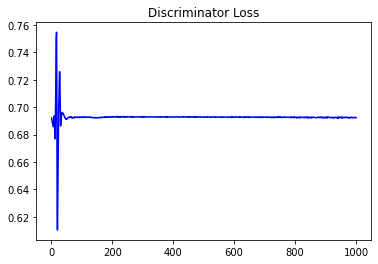

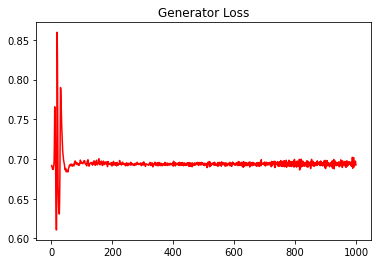

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2617416886783036


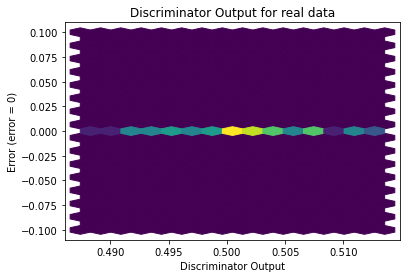

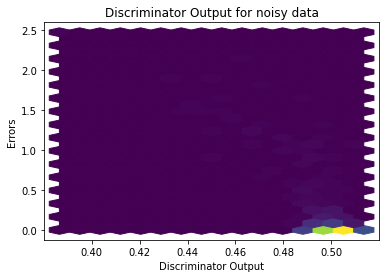

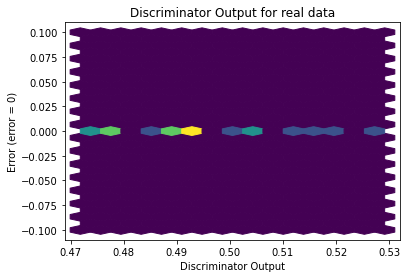

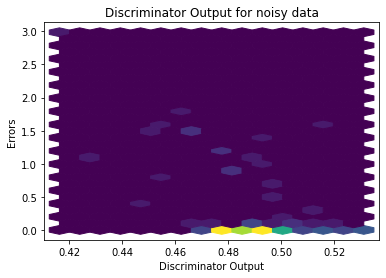

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


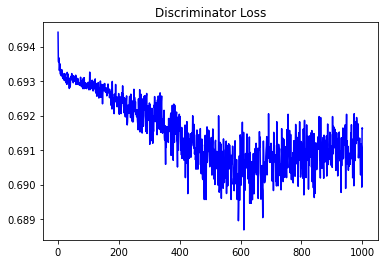

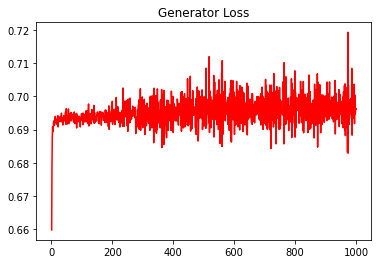

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.24528207490336063


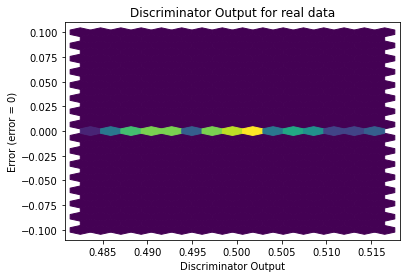

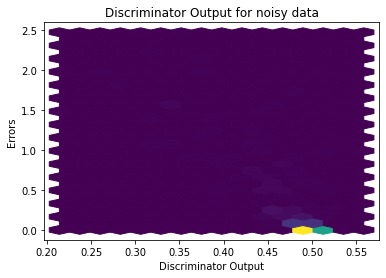

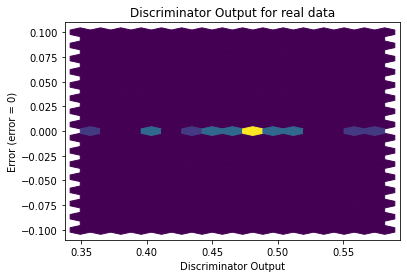

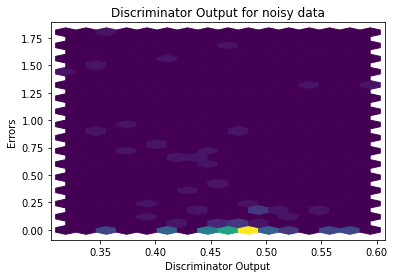

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2354]], requires_grad=True)
